In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis= 1, inplace= True)

#### **Label Encoder**

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [16]:
age_mean = df["Age"].mean()
df["Age"] = df["Age"].fillna(age_mean)

In [17]:
df.isna().sum().sum()

0

<Axes: >

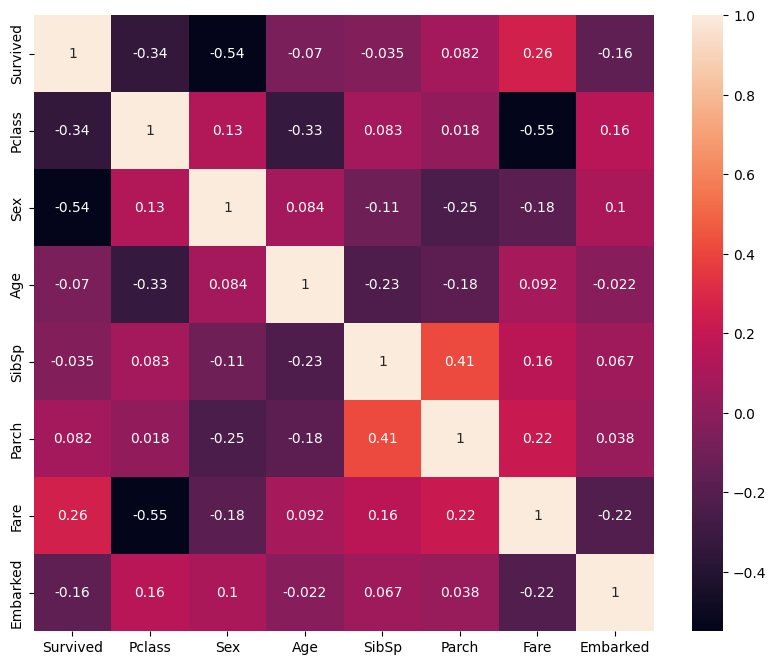

In [18]:
plt.figure(figsize= (10, 8), dpi= 100)
sns.heatmap(df.corr(), annot= True)

<Axes: xlabel='Pclass', ylabel='Fare'>

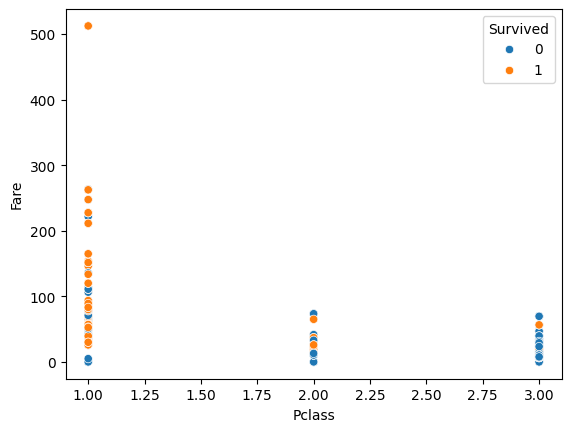

In [20]:
sns.scatterplot(x= "Pclass", y= "Fare", hue= "Survived", data=df)

<Axes: xlabel='Age', ylabel='Pclass'>

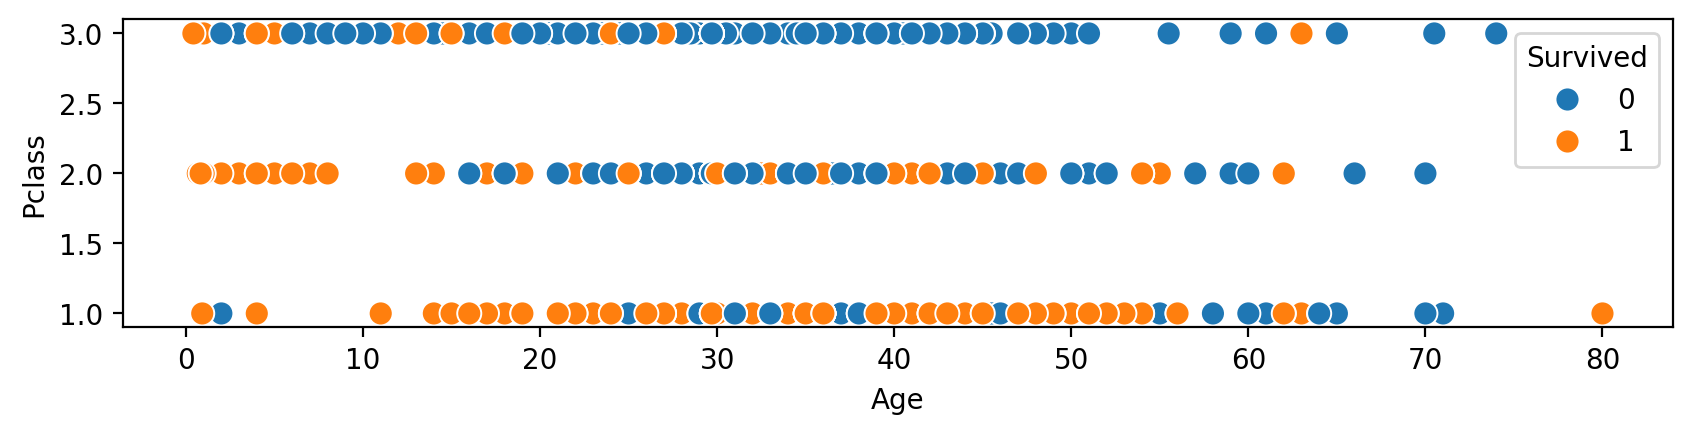

In [23]:
plt.figure(figsize=(10, 2), dpi=200)

sns.scatterplot(x = "Age", y = "Pclass",data=df, hue="Survived", s= 75)

In [24]:
df[["Pclass", "Survived"]].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
Name: count, dtype: int64

In [36]:
# Third class passengers survival rate

third_survive = len(df[(df["Pclass"] == 3) & (df["Survived"] == 1)])
all_thirds = len(df[df["Pclass"] == 3])

third_sur_rate = round(third_survive / all_thirds, 2)
third_sur_rate

0.24

In [37]:
first_survive = len(df[(df["Pclass"] == 1) & (df["Survived"] == 1)])
all_first = len(df[df["Pclass"] == 1])

first_sur_rate = round(first_survive / all_first, 2)
first_sur_rate

0.63

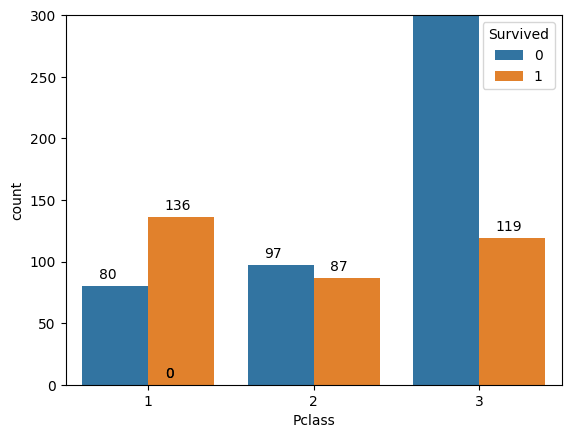

In [38]:
ax = sns.countplot(x="Pclass", data=df, hue="Survived")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0,300);

##### **X and y**

In [41]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

### **Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 9)

### **Random Forest**

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [51]:
rand_frst = RandomForestClassifier()

In [52]:
params = {
    "n_estimators" : [50, 100, 150, 200],
    "max_features" : [1, 2, 3, 4]
    }

In [53]:
rand_grid = GridSearchCV(rand_frst, param_grid= params)

In [54]:
rand_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]})

In [55]:
rand_grid.best_params_

{'max_features': 4, 'n_estimators': 50}

In [58]:
best_rand_frst = RandomForestClassifier(max_features= 4, n_estimators= 50)
best_rand_frst.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=50)

In [60]:
best_rand_pred = best_rand_frst.predict(X_test)

In [63]:
print(classification_report(y_test, best_rand_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       162
           1       0.81      0.69      0.74       106

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



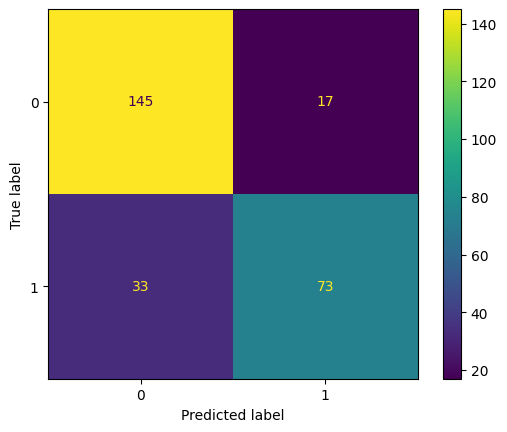

In [64]:
ConfusionMatrixDisplay.from_estimator(best_rand_frst, X_test, y_test)

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### **Standart Scaler**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [70]:
num_neighbours = [1, 3, 5, 7, 9]

for n in num_neighbours:
    knn_test = KNeighborsClassifier(n_neighbors= n)
    knn_test.fit(scaled_X_train, y_train)

    knn_pred = knn_test.predict(scaled_X_test)
    acc = accuracy_score(y_test, knn_pred)

    print(f"Number of Neighbours : {n}, Accuracy Score : {acc}")

Number of Neighbours : 1, Accuracy Score : 0.7388059701492538
Number of Neighbours : 3, Accuracy Score : 0.7910447761194029
Number of Neighbours : 5, Accuracy Score : 0.7873134328358209
Number of Neighbours : 7, Accuracy Score : 0.7835820895522388
Number of Neighbours : 9, Accuracy Score : 0.7873134328358209


In [71]:
best_knn = KNeighborsClassifier(n_neighbors= 3)
best_knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
best_knn_pred = best_knn.predict(scaled_X_test)

In [74]:
print(classification_report(y_test, best_knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       162
           1       0.79      0.64      0.71       106

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



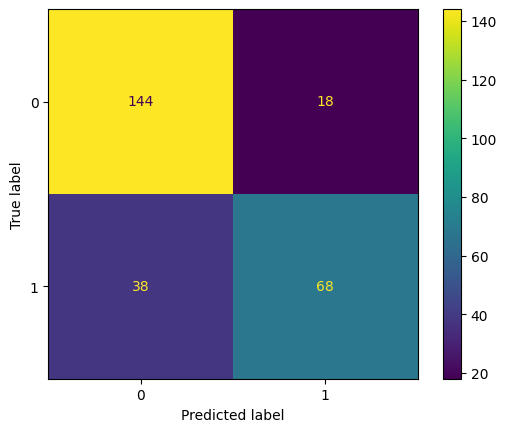

In [76]:
ConfusionMatrixDisplay.from_estimator(best_knn, scaled_X_test, y_test  )

### **SVM - SVC**

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [79]:
svc = SVC()

In [80]:
C = C = 10.0 ** np.arange(-2, 4)

params = {
    "kernel" : ["rbf", "poly"],
    "degree" : [2, 3, 4],
    "C" : C
    }

In [81]:
svm_grid = GridSearchCV(svc, param_grid= params, cv=9)
svm_grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [82]:
svm_grid.best_params_

{'C': 1.0, 'degree': 2, 'kernel': 'rbf'}

In [83]:
svm_grid_pred = svm_grid.predict(scaled_X_test)

In [84]:
print(classification_report(y_test, svm_grid_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       162
           1       0.80      0.68      0.73       106

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



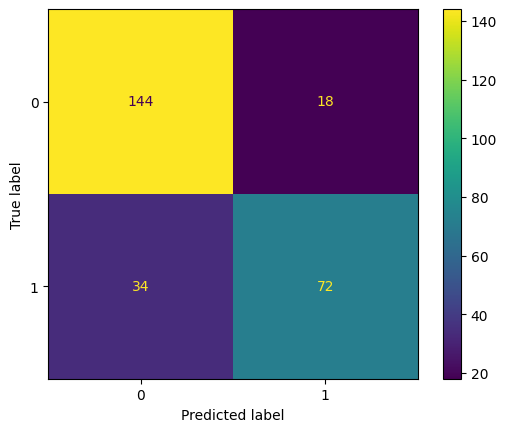

In [85]:
ConfusionMatrixDisplay.from_estimator(svm_grid, scaled_X_test, y_test)

### Models